# ¡Hola Fercho! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>


A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


----

<div class="alert alert-block alert-warning">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Fercho, tu trabajo presenta un análisis sólido, con un manejo acertado de las funciones clave de agrupación, combinación y cálculo, lo cual se refleja en la claridad de tu proceso y en la precisión de los resultados obtenidos. Además, tu interpretación de los datos y la forma en que conectaste las conclusiones con factores del negocio demuestran un buen criterio analítico. 

Nop obstante es necesario que extiendas la estructura de análisis que aplicaste a las llamadas también a los demás tipos de datos (mensajes, internet e ingresos), con el fin de tener una comparación más completa del comportamiento de los usuarios. También podrías mejorar la visualización de algunos gráficos para facilitar su lectura. 

Vas por muy buen camino, afina esos detalles y tu análisis quedará aún más completo y profesional.

Estaré atento a tu próxima iteración 👀


</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Fercho excelente trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. Estoy seguro de que lo que aprendiste aquí te será muy útil más adelante. 

¡Éxito en tu próximo sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

------

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import math 
from scipy import stats
from scipy import stats as st
from scipy.stats import levene

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Los datos que contiene cada fila representa un tipo de plan de alguno de los dos que cuenta la tienda, los datos no cuentan condatos ausenes ni duplicados, tampoco se encuentran datos ausentes y los tipos de datos son correctos, es un data limpio y en orden listo para trabajar con el.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
#No encontre probremas en este dataframe 

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
#El data cuenta con datos muy precisos no es necesario agregar mas datos

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

print('Informacion general de Usuarios')
print()
print(users.info())

Informacion general de Usuarios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [8]:
# Imprime una muestra de datos para usuarios
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Este data si cuenta con un error en las columnas reg_date y churn_date tienen un Dtype en formato objet deberia de tener valores datetime es necesario cambiarlo para que no haya confusiones, se cuentan con valores ausentes en la columna churn_date pero estsos valores indican que en el momento de recabar los datos el plan del usuario seguia activo.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
users.info()
print()
print(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
#Este Dataframe cuenta con datos suficientes no es necesario enriquecer mas los datos ya que solo cuenta con la informacion de cada cliente al momento de recabar los datos


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
UNa vez mas las columnas que cuentan con fechas tienen un formato de object es necesario cambiarlo a datetime ademas de que la columna duration esta en formato float cuando al momento de hacer el cobro se tomara como un numero cerrado, no es necesario tenerlo en este formato ademas que puede causar confucciones es necesario cambiarlo al formato int.
Ademas es necesario hacer una investigacion sobre los minutos gastados por usuario.


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()
print(calls.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
calls['duration'] = np.ceil(calls['duration'])
calls.info()
print(calls.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27       9.0
1  1000_145     1000 2018-12-27      14.0
2  1000_247     1000 2018-12-27      15.0
3  1000_309     1000 2018-12-28       6.0
4  1000_380     1000 2018-12-30       5.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo Fercho! Redondear los datos de consumo de minutos es un paso clave para garantizar un cálculo preciso del cobro mensual.

</div>

## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes
print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Los datos de messages_date estan en object cuando deberiaan estar en datetime, ademas de que deberiamos hacer una investigacion mas detallada de cuantos mensajes uso cada usuario.


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
#No creo que haya un dato que puediera ser de utilidad en este dataframe


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

El unico error que veo es que hemos tenido en todos los dataframes la fecha tiene formato incorrecto, en este caso los mb tambien se redondea para hacer el cobro pero es necesario sumar todas las entradas del mesa para saber como se va a redondear.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo en el análisis preliminar de los datasets. Usaste correctamente las funciones `info` y `head` para revisar la estructura y el contenido de los datos, lo que te permitió realizar los ajustes necesarios. Esto facilitará el análisis de los datos y el desarrollo de las demás etapas del proyecto.


</div>

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
#Aqui tampoco hay algo que pueda enriquecer el data.a

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
#totales = {}
calls['month'] = calls['call_date'].dt.month
num_calls  = calls.groupby(['user_id', 'month'])['call_date'].count().reset_index()
print(num_calls)
#num = calls[calls['user_id']==1000]
#print(num)

      user_id  month  call_date
0        1000     12         16
1        1001      8         27
2        1001      9         49
3        1001     10         65
4        1001     11         64
...       ...    ...        ...
2253     1498     12         39
2254     1499      9         41
2255     1499     10         53
2256     1499     11         45
2257     1499     12         65

[2258 rows x 3 columns]


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
num_min = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
print(num_min)

      user_id  month  duration
0        1000     12     124.0
1        1001      8     182.0
2        1001      9     315.0
3        1001     10     393.0
4        1001     11     426.0
...       ...    ...       ...
2253     1498     12     339.0
2254     1499      9     346.0
2255     1499     10     385.0
2256     1499     11     308.0
2257     1499     12     496.0

[2258 rows x 3 columns]


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['month'] = messages['message_date'].dt.month
num_mens = messages.groupby(['user_id', 'month'])['message_date'].count().reset_index()
print(num_mens)

      user_id  month  message_date
0        1000     12            11
1        1001      8            30
2        1001      9            44
3        1001     10            53
4        1001     11            36
...       ...    ...           ...
1801     1496      9            21
1802     1496     10            18
1803     1496     11            13
1804     1496     12            11
1805     1497     12            50

[1806 rows x 3 columns]


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['month'] = internet['session_date'].dt.month 
vol_traf = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
print(vol_traf)

      user_id  month   mb_used
0        1000     12   1901.47
1        1001      8   6919.15
2        1001      9  13314.82
3        1001     10  22330.49
4        1001     11  18504.30
...       ...    ...       ...
2272     1498     12  23137.69
2273     1499      9  12984.76
2274     1499     10  19492.43
2275     1499     11  16813.83
2276     1499     12  22059.21

[2277 rows x 3 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:

# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
totales = num_calls.merge(num_min, on=['user_id', 'month'], how='outer')
totales = totales.merge(num_mens, on=['user_id', 'month'], how='outer')
totales = totales.merge(vol_traf, on=['user_id', 'month'], how='outer')
totales.columns=['user_id','month', 'num_calls', 'num_minuts', 'num_menssages', 'mb_used']
print(totales)


      user_id  month  num_calls  num_minuts  num_menssages   mb_used
0        1000     12       16.0       124.0           11.0   1901.47
1        1001      8       27.0       182.0           30.0   6919.15
2        1001      9       49.0       315.0           44.0  13314.82
3        1001     10       65.0       393.0           53.0  22330.49
4        1001     11       64.0       426.0           36.0  18504.30
...       ...    ...        ...         ...            ...       ...
2288     1349     12        NaN         NaN           61.0  13039.91
2289     1361      5        NaN         NaN            2.0   1519.69
2290     1482     10        NaN         NaN            2.0       NaN
2291     1108     12        NaN         NaN            NaN    233.17
2292     1311      6        NaN         NaN            NaN   1498.83

[2293 rows x 6 columns]


In [29]:
# Añade la información de la tarifa
totales = totales.merge(users[['user_id', 'plan']], on='user_id', how='left')
totales = totales.merge(plans, left_on='plan', right_on='plan_name', how='left')
print(totales)

      user_id  month  num_calls  num_minuts  num_menssages   mb_used  \
0        1000     12       16.0       124.0           11.0   1901.47   
1        1001      8       27.0       182.0           30.0   6919.15   
2        1001      9       49.0       315.0           44.0  13314.82   
3        1001     10       65.0       393.0           53.0  22330.49   
4        1001     11       64.0       426.0           36.0  18504.30   
...       ...    ...        ...         ...            ...       ...   
2288     1349     12        NaN         NaN           61.0  13039.91   
2289     1361      5        NaN         NaN            2.0   1519.69   
2290     1482     10        NaN         NaN            2.0       NaN   
2291     1108     12        NaN         NaN            NaN    233.17   
2292     1311      6        NaN         NaN            NaN   1498.83   

          plan  messages_included  mb_per_month_included  minutes_included  \
0     ultimate               1000                  30720 

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario
#calcular los excesos

totales['exceso_calls'] = np.maximum(0, totales['num_minuts'] - totales['minutes_included'])
totales['exceso_messages'] = np.maximum(0, totales['num_menssages'] - totales['messages_included'])

#calcular datos de redondeo 

totales['gb_usados'] = np.ceil(totales['mb_used'] / 1024)
totales['gb_included'] = totales['mb_per_month_included'] / 1024
totales['exceso_gb'] = np.maximum(0, totales['gb_usados'] - totales['gb_included']) 

#calcular cada costo de tipo

totales['costo_exc_min'] = totales['exceso_calls'] * totales['usd_per_minute']
totales['costo_exc_messages'] = totales['exceso_messages'] * totales['usd_per_message']
totales['costo_exc_gb'] = totales['exceso_gb'] * totales['usd_per_gb']

#calculo de ingreso mensaual

totales['ingreso_mensual'] = (totales['usd_monthly_pay'] + totales['costo_exc_min'] + totales['costo_exc_messages'] + totales['costo_exc_gb'])

print(totales)#['ingreso_mensual'])



      user_id  month  num_calls  num_minuts  num_menssages   mb_used  \
0        1000     12       16.0       124.0           11.0   1901.47   
1        1001      8       27.0       182.0           30.0   6919.15   
2        1001      9       49.0       315.0           44.0  13314.82   
3        1001     10       65.0       393.0           53.0  22330.49   
4        1001     11       64.0       426.0           36.0  18504.30   
...       ...    ...        ...         ...            ...       ...   
2288     1349     12        NaN         NaN           61.0  13039.91   
2289     1361      5        NaN         NaN            2.0   1519.69   
2290     1482     10        NaN         NaN            2.0       NaN   
2291     1108     12        NaN         NaN            NaN    233.17   
2292     1311      6        NaN         NaN            NaN   1498.83   

          plan  messages_included  mb_per_month_included  minutes_included  \
0     ultimate               1000                  30720 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Perfecto Fercho! Hiciste un excelente uso de las funciones `groupby`  y `merge`, logrando agrupar correctamente la información de consumo de llamadas, mensajes e internet de cada usuario por mes, inclusive considerando las condiciones de redondeo. Además, calculaste de manera precisa el cobro mensual y reflejaste los valores correctos en la columna *ingreso_mensual*. ¡Buen trabajo!

</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

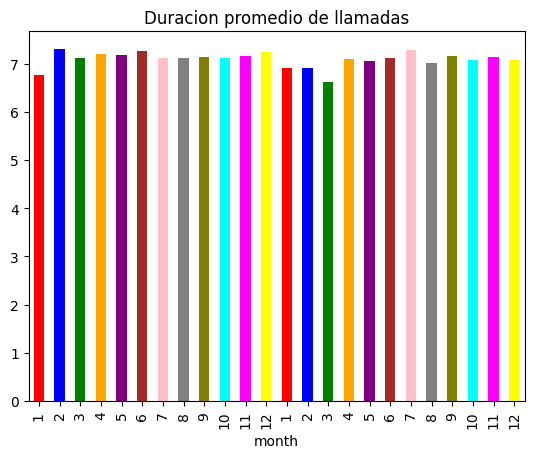

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
calls_plan = calls.merge(users[['user_id', 'plan']], on='user_id', how='left')
duracion_mean = calls_plan.groupby(['plan', 'month'])['duration'].mean().reset_index() 
#print(duracion_mean)
duracion_mean.plot(title='Duracion promedio de llamadas', legend=False, kind= 'bar', x='month', y='duration', color=['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow'])
plt.show()

In [51]:
calls_plan

,id,user_id,call_date,duration,month,plan
0,1000_93,1000,2018-12-27,9.0,12,ultimate
1,1000_145,1000,2018-12-27,14.0,12,ultimate
2,1000_247,1000,2018-12-27,15.0,12,ultimate
3,1000_309,1000,2018-12-28,6.0,12,ultimate
4,1000_380,1000,2018-12-30,5.0,12,ultimate
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,11,surf
137731,1499_200,1499,2018-10-20,11.0,10,surf
137732,1499_201,1499,2018-09-21,9.0,9,surf
137733,1499_202,1499,2018-10-10,1.0,10,surf


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Para este tipo de gráficos es mejor estructurarlo definiendo los meses en el eje X y configurando la identificación de colores para los dos planes. De esta forma, la información será más clara de ver y de interpretar. Algo como la siguiente imagen:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20210216005002/Multiplebarcharts1.png" width="400">

En este enlace puedes ver una explicación de cómo se puede crear este tipo de gráficos: [Enlace](https://www.geeksforgeeks.org/python/plotting-multiple-bar-charts-using-matplotlib-in-python/)

</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Te comparto una forma de crear una diagrama de barras comparativa para revisar el promedio de duración para cada plan, esto facilita el análisis

    import seaborn as sns

    duracion_por_mes_plan = calls_plan.groupby(['month', 'plan'])['duration'].mean().reset_index()
    
    sns.barplot(data=duracion_por_mes_plan, x='month', y='duration', hue='plan')
    
    plt.show()

</div>

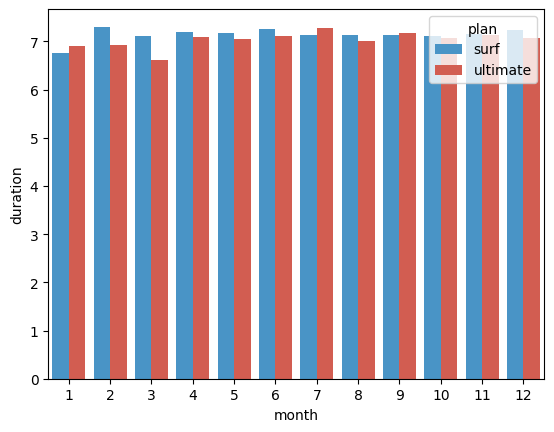

In [61]:
import seaborn as sns

duracion_por_mes_plan = calls_plan.groupby(['month', 'plan'])['duration'].mean().reset_index()

sns.barplot(data=duracion_por_mes_plan, x='month', y='duration', hue='plan')

plt.show()

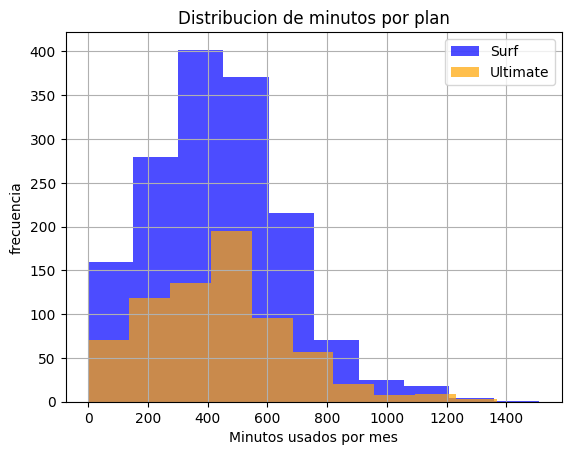

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_min = totales[totales['plan']=='surf']['num_minuts']
ultimate_min = totales[totales['plan']=='ultimate']['num_minuts']

surf_min.hist(alpha=0.7, color='blue', label='Surf')
ultimate_min.hist(color='orange', alpha=0.7, label='Ultimate')
plt.title('Distribucion de minutos por plan')
plt.xlabel('Minutos usados por mes')
plt.ylabel('frecuencia')
plt.legend()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print(duracion_mean)
calls_mont = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
#print(calls_mont)
print()
varianza_min = calls_mont.var()
print(varianza_min)


        plan  month  duration
0       surf      1  6.766667
1       surf      2  7.303279
2       surf      3  7.106742
3       surf      4  7.191899
4       surf      5  7.173700
5       surf      6  7.251863
6       surf      7  7.124836
7       surf      8  7.124718
8       surf      9  7.128537
9       surf     10  7.120604
10      surf     11  7.160421
11      surf     12  7.239358
12  ultimate      1  6.910714
13  ultimate      2  6.916667
14  ultimate      3  6.614130
15  ultimate      4  7.088176
16  ultimate      5  7.054491
17  ultimate      6  7.110522
18  ultimate      7  7.276061
19  ultimate      8  7.015709
20  ultimate      9  7.166857
21  ultimate     10  7.066706
22  ultimate     11  7.138889
23  ultimate     12  7.073878

user_id     20547.562782
month           6.228942
duration    53811.168009
dtype: float64


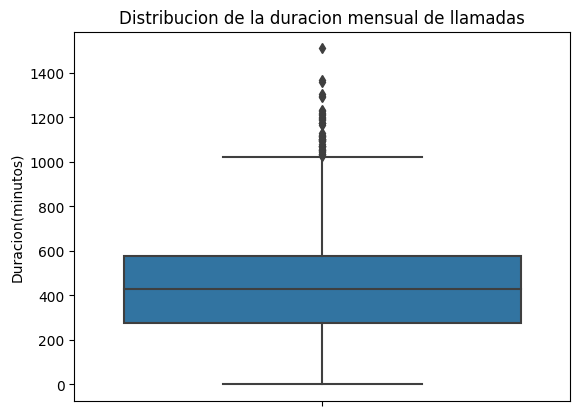

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(data=calls_mont, y='duration')
plt.title('Distribucion de la duracion mensual de llamadas')
plt.ylabel('Duracion(minutos)')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

La mayoria de los usuarios usan 400 minutos, en los dos planes la media es muy similar pero hay muchos mas usuarios en el plan surf que en el plan ultimate, podrian impulsar el plan ultimate para que los usuarios cambien su plan.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

La estructura de análisis del comportamiento de consumo de los usuarios (visualizaciones y cálculo de valores estadísticos) que empleaste para los datos de **llamadas** está muy bien. Debes usar la misma estructura de análisis para los demás conjuntos de datos: **mensajes, internet e ingresos**, es decir mostrar los mismos gráficos y obtener los valores estadísticos para estos conjunto de datos. Lo anterior, con el fin de lograr hacer una comparación detallada del comportamiento de los usuarios de cada plan.

</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

Agregue graficos a las demas comparaciones que no las tenian para que la visualizacion sea mas clara, creo entender que esto es a lo que se referia en su comentario gracias por los comentarios

</div>

### Mensajes

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
plan_messages = num_mens.merge(users[['user_id', 'plan']], on='user_id', how='left')
plan_messages.columns='user_id', 'month', 'num_messages', 'plan'
print(plan_messages)

      user_id  month  num_messages      plan
0        1000     12            11  ultimate
1        1001      8            30      surf
2        1001      9            44      surf
3        1001     10            53      surf
4        1001     11            36      surf
...       ...    ...           ...       ...
1801     1496      9            21      surf
1802     1496     10            18      surf
1803     1496     11            13      surf
1804     1496     12            11      surf
1805     1497     12            50  ultimate

[1806 rows x 4 columns]


In [36]:
surf_messages = plan_messages[plan_messages['plan']=='surf']['num_messages']
ultimate_messages = plan_messages[plan_messages['plan']=='ultimate']['num_messages']

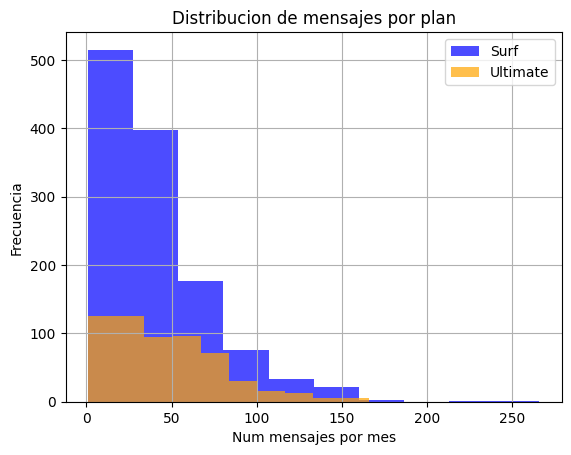

In [37]:
surf_messages.hist(alpha=0.7, color='blue', label='Surf')
ultimate_messages.hist(alpha=0.7, color='orange', label='Ultimate')
plt.title('Distribucion de mensajes por plan')
plt.xlabel('Num mensajes por mes')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

podemos ver que la yoria de los usuarios tienen un promedio por mes de mensajes de 25 al mes lo cual no es tanto tal vez sea por la invencion de las redes sociales, algo a ver es que la frecuencia de los usuarios del plan surf son casi 5 vaces mas que las del plan ultimate esto puede deberse a que el plan ultimate tiene menos usuarios. 

### Internet

In [38]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan 
surf_gb = totales[totales['plan']=='surf']
ultimate_gb = totales[totales['plan']=='ultimate']
#print(surf_gb)

In [39]:
media_surf = surf_gb['gb_usados'].mean()
mediana_surf = surf_gb['gb_usados'].median()
surf_des_estan = surf_gb['gb_usados'].std()
media_ultimate = ultimate_gb['gb_usados'].mean()
mediana_ultimate = ultimate_gb['gb_usados'].median()
ultimate_des_estan = ultimate_gb['gb_usados'].std()

In [40]:
print('Plan Surf')
print()
print(f'Media del plan Surf:', media_surf)
print(f'Mediana del plan Surf:', mediana_surf)
print(f'Desviacion estandar del plan Surf:', surf_des_estan)
print()
print()
print('Plan Ultimate')
print(f'Media del plan Ultimate:', media_ultimate)
print(f'Mediana del plan Ultimate', mediana_ultimate)
print(f'Desviacion estandar del plan Ultimate', ultimate_des_estan)

Plan Surf

Media del plan Surf: 16.831193838254173
Mediana del plan Surf: 17.0
Desviacion estandar del plan Surf: 7.711921556321404


Plan Ultimate
Media del plan Ultimate: 17.331015299026426
Mediana del plan Ultimate 17.0
Desviacion estandar del plan Ultimate 7.648184953980576


In [41]:
print(surf_gb)

      user_id  month  num_calls  num_minuts  num_menssages   mb_used  plan  \
1        1001      8       27.0       182.0           30.0   6919.15  surf   
2        1001      9       49.0       315.0           44.0  13314.82  surf   
3        1001     10       65.0       393.0           53.0  22330.49  surf   
4        1001     11       64.0       426.0           36.0  18504.30  surf   
5        1001     12       56.0       412.0           44.0  19369.18  surf   
...       ...    ...        ...         ...            ...       ...   ...   
2282     1194     12        NaN         NaN           56.0  31088.49  surf   
2286     1349     10        NaN         NaN           76.0  13093.55  surf   
2287     1349     11        NaN         NaN           72.0  17128.26  surf   
2288     1349     12        NaN         NaN           61.0  13039.91  surf   
2289     1361      5        NaN         NaN            2.0   1519.69  surf   

      messages_included  mb_per_month_included  minutes_include

In [42]:
surf_gb = totales[totales['plan']=='surf']['gb_usados']

ultimate_gb = totales[totales['plan']=='ultimate']['gb_usados']


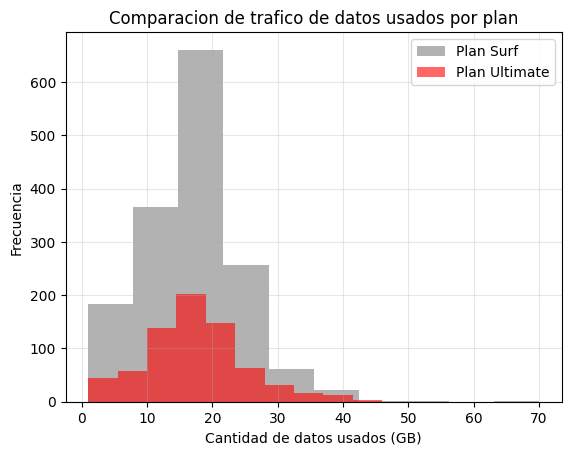

In [43]:
surf_gb.hist(alpha=0.6, color='grey', label='Plan Surf')
ultimate_gb.hist(alpha=0.6, color='red', label='Plan Ultimate')
plt.title('Comparacion de trafico de datos usados por plan')
plt.xlabel('Cantidad de datos usados (GB)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Los datos suelen serr muy similares en los dos planes a pesar de que tienen diferentes limites en cuestion de gb podria ser una buena sugerencia abrir un plan con una media de los dos planes para que las personas no tengan que contratar un plan fijo o otro.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [44]:
surf_ingresos = totales[totales['plan']=='surf']['ingreso_mensual']
ultimate_ingresos = totales[totales['plan']=='ultimate']['ingreso_mensual']

In [45]:
media_surf_ingreso = surf_ingresos.mean()
print(f'Media del ingreso mensual del plan Surf:', media_surf_ingreso)
mediana_surf_ingreso = surf_ingresos.median()
print(f'Mediana del ingreso mensual del plan Surf:', mediana_surf_ingreso)
desvi_estan_ingre_surf = surf_ingresos.std()
print(f'Desviacion estandar de los ingresos mensuales del plan surf', desvi_estan_ingre_surf)
print(f'Rangon $: {surf_ingresos.max() - surf_ingresos.min()}')
print()
print()
media_ultimate_ingreso = ultimate_ingresos.mean()
print(f'Media del ingreso mensual del plan Ultimate:', media_ultimate_ingreso)
mediana_ultimate_ingreso = ultimate_ingresos.median()
print(f'Mediana del ingreso mensual del plan Ultimate:', mediana_ultimate_ingreso)
desvi_estan_ingre_ulti =  ultimate_ingresos.std()
print(f'desviacion estandar del ingreso mensual del plan Ultimate', desvi_estan_ingre_ulti)
print(f'Rango $: {ultimate_ingresos.max() - ultimate_ingresos.min()} ')

Media del ingreso mensual del plan Surf: 60.41583898305085
Mediana del ingreso mensual del plan Surf: 41.035
Desviacion estandar de los ingresos mensuales del plan surf 53.59573877955266
Rangon $: 570.37


Media del ingreso mensual del plan Ultimate: 72.24870466321244
Mediana del ingreso mensual del plan Ultimate: 70.0
desviacion estandar del ingreso mensual del plan Ultimate 11.034405655983079
Rango $: 112.0 


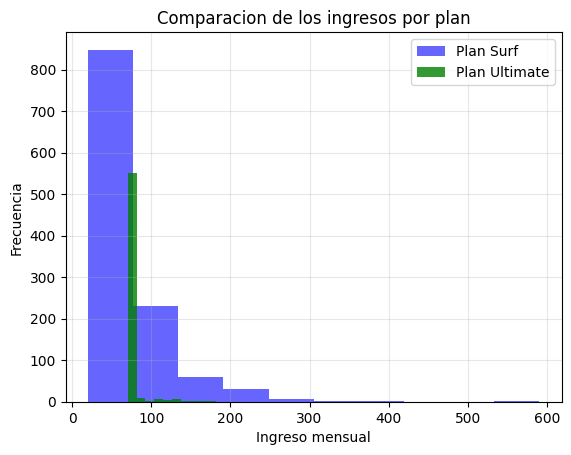

In [46]:
surf_ingresos = totales[totales['plan']=='surf']['ingreso_mensual']
ultimate_ingresos = totales[totales['plan']=='ultimate']['ingreso_mensual']
surf_ingresos.hist(alpha=0.6, color='blue', label='Plan Surf')
ultimate_ingresos.hist(alpha=0.8, color='green', label='Plan Ultimate')
plt.title('Comparacion de los ingresos por plan')
plt.xlabel('Ingreso mensual')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [47]:
print(f'Diferencia de ingreso promedio en tre el plan Ultimate y Surf ${media_ultimate_ingreso - media_surf_ingreso}')
print(f'ratio de ultimate/surf: {media_ultimate_ingreso/media_surf_ingreso}')

Diferencia de ingreso promedio en tre el plan Ultimate y Surf $11.83286568016159
ratio de ultimate/surf: 1.1958570116601575


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

El ingreso en mensual en el plan ultimate es mayor qu en el plan ultimate aunque hay mas usuarios en el surf esto puede ser a la diferencia de veneficio, el plan ultimate te da muchos mas veneficios que el surf, a pesar del costo los ususarios prefieren gastar mas por un veneficio mejor. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo complementando el análisis de los conjuntos de datos

</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [48]:

# Prueba las hipótesis
#Hipótesis nula: Los ingresos promedio de los usuarios ultimate y surf son iguales.
#hipotesis altenativa: los ingresos promedio de los usuarios no son iguales.
ultimate_ingresos = ultimate_ingresos.dropna()
surf_ingresos = surf_ingresos.dropna()

stat, p_value= levene(ultimate_ingresos, surf_ingresos)

print(f"Estadístico de Levene: {stat}")
print(f"Valor p: {p_value}")


alpha = 0.05
estadistica, p_value = stats.ttest_ind(ultimate_ingresos, surf_ingresos)
print(f"Estadística t: {estadistica}")
print(f"Valor p: {p_value}")
print()
if p_value < alpha:
    print('Se rechaza la hipotesis nula')
else:
    print('La hipotesis nula se acepta')

Estadístico de Levene: 339.2331337643379
Valor p: 2.0941791851303886e-69
Estadística t: 5.25738620327122
Valor p: 1.6396969942407258e-07

Se rechaza la hipotesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [49]:

# Prueba las hipótesis
#hipotesis nula: los ingresos promedio de los usuarios del area de NJ-NY son iguales a los de otras regiones
#hipotesis alternativa: los ingresos promedio de los usuarios de NJ-NY son diferentes a los de otras regiones
totales = totales.merge(users[['user_id', 'city']], on='user_id', how='left')


In [50]:
nj_ny_ingresos = totales[totales['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['ingreso_mensual'].dropna()
otras_city = totales[totales['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['ingreso_mensual'].dropna()

stat, p_value= levene(nj_ny_ingresos, otras_city)

print(f"Estadístico de Levene: {stat}")
print(f"Valor p: {p_value}")

alpha = 0.05
results = st.ttest_ind(nj_ny_ingresos, otras_city, equal_var=False)

print('valor_p:', results.pvalue)
if (results.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Estadístico de Levene: 0.039034931753291896
Valor p: 0.8434023289798585
valor_p: 0.004477811025531861
Rechazamos la hipótesis nula


Podemos ver que los ingresos son muy diferentes para la ciudad de NY dado que la mayoria de los usuarios se encuentran en esta ciudaad tendriamos que estudiar mas aprofundidad las demas ciudades y saber el porque tan pocos usuarios estan registrados en las demas ciudades


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Fercho aplicaste correctamente las pruebas de hipótesis comparando la distribución de dos muestras independientes e interpretando de manera acertada el *p-value* obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de  [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto te brindará una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

</div>
</div>

<div class="alert alert-block alert-info">

Use la prueba y es de gran ayuda gracias por la recomendacion.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo implmenentando la prueba de Levene

</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Puedo observar que en general hay muchas bajas de usuarios para este análisis esto se debe a que los usuarios dejaron de usar el plan que contrataron esto requiere un análisis más amplio de marketing para saber a qué se debe las bajas de estos usuarios, por otro lado a muchos más usuarios en el plan surf que en el plan ultimate puede ser debido al precio del plan porque en promedio suelen tener el mismo número de llamadas, mensajes, y uso de mb, tal vez debería de crearse un plan intermedio para que los usuarios se suscriban a este, porque note que los usuarios del plan surf prefieren pagar un mb extra a cambiar de plan para tener más veneficios esto también necesita un análisis más amplio para saber a qué se debe esta decisión, por último pude notar que las ciudades de NY son las que cuentan con más usuarios en ocupar casi el 50 % de los usuarios de la plataforma tal vez debería de impulsarse más el marketing en otras ciudades con promociones de ingreso al plan o beneficios para los usuarios que ya cuentan con un plan y desean cambiar al plan ultimate son mis conclusiones espero sean de utilidad.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu conclusión refleja un buen análisis sobre el comportamiento de los usuarios frente a los planes contratados, relacionando las bajas y permanencias con posibles factores de precio y conveniencia

</div>